In [1]:
from cyclum import tuning, models

Using TensorFlow backend.


In [2]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse

import numpy as np
import matplotlib.pyplot as plt

In [3]:
seed = 3
np.random.seed(seed)

cell_time = np.random.uniform(-2 * np.pi, 2 * np.pi, [1000, 1])

gene01_phase = np.random.uniform(0, 2 * np.pi, [1, 500])
gene01_time = np.random.normal(0, 0.2, [1, 500])
gene01_speed = np.random.uniform(0.5, 2.5, [1, 500])

gene0_phase = np.random.uniform(0, 2 * np.pi, [1, 800])

gene1_time = np.random.normal(0, 0.2, [1, 1000])
gene1_speed = np.random.uniform(0.5, 2.5, [1, 1000])

gene0 = np.sin(cell_time - gene0_phase)
gene1 = np.tanh(gene1_speed * (cell_time - gene1_time))
gene01 = np.sin(cell_time - gene01_phase) + np.tanh(gene01_speed * (cell_time - gene01_time))

Text(0, 0.5, 'Simulated gene expression level')

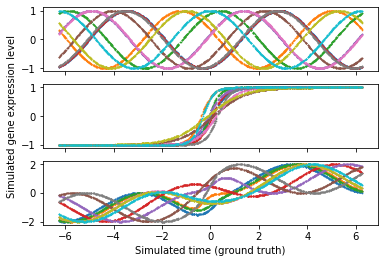

In [4]:
fig, ax = plt.subplots(3, 1, sharex=True)

for i in range(10):
    ax[0].scatter(x=cell_time, y=gene0[:, i], s=.5)

for i in range(10):
    ax[1].scatter(x=cell_time, y=gene1[:, i], s=.5)

for i in range(10):
    ax[2].scatter(x=cell_time, y=gene01[:, i], s=.5)

ax[2].set_xlabel('Simulated time (ground truth)')
ax[1].set_ylabel('Simulated gene expression level')

In [5]:
gene = np.hstack([gene0, gene1, gene01])
model = tuning.CyclumAutoTune(gene, early_stop=False)

Auto tuning number of linear components...
Performing PCA...
Training Autoencoder with...
    0 linear dimensions...




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


epoch: 100/500, loss:  0.1808, time elapsed:  30.82s, time left:  123.28s
epoch: 200/500, loss:  0.1704, time elapsed:  43.30s, time left:  64.95s
epoch: 300/500, loss:  0.1700, time elapsed:  55.75s, time left:  37.17s
epoch: 400/500, loss:  0.1689, time elapsed:  67.93s, time left:  16.98s
epoch: 500/500, loss:  0.1679, time elapsed:  80.36s, time left:  0.00s
[0.1678783392906189]
[0.28981344668127446, 0.1404768746100186, 0.004920241915457755, 0.0026895575236163425, 0.0013551438991179089]
    1 linear dimensions...
epoch: 100/500, loss:  0.0558, time elapsed:  13.01s, time left:  52.04s
epoch: 200/500, loss:  0.0489, time elapsed:  25.09s, time left:  37.64s
epoch: 300/500, loss:  0.0464, time elapsed:  37.66s, time left:  25.11s
epoch: 400/500, loss

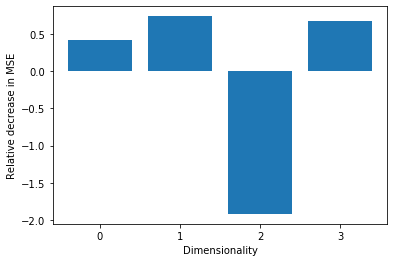

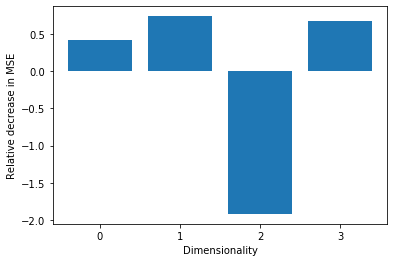

In [6]:
model.show_bar()

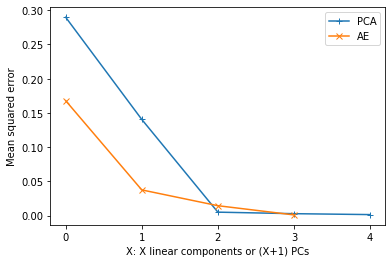

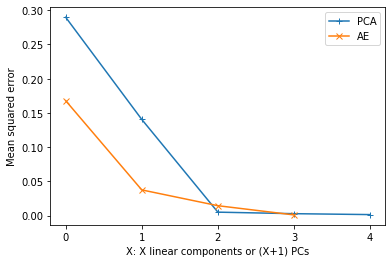

In [7]:
model.show_elbow()

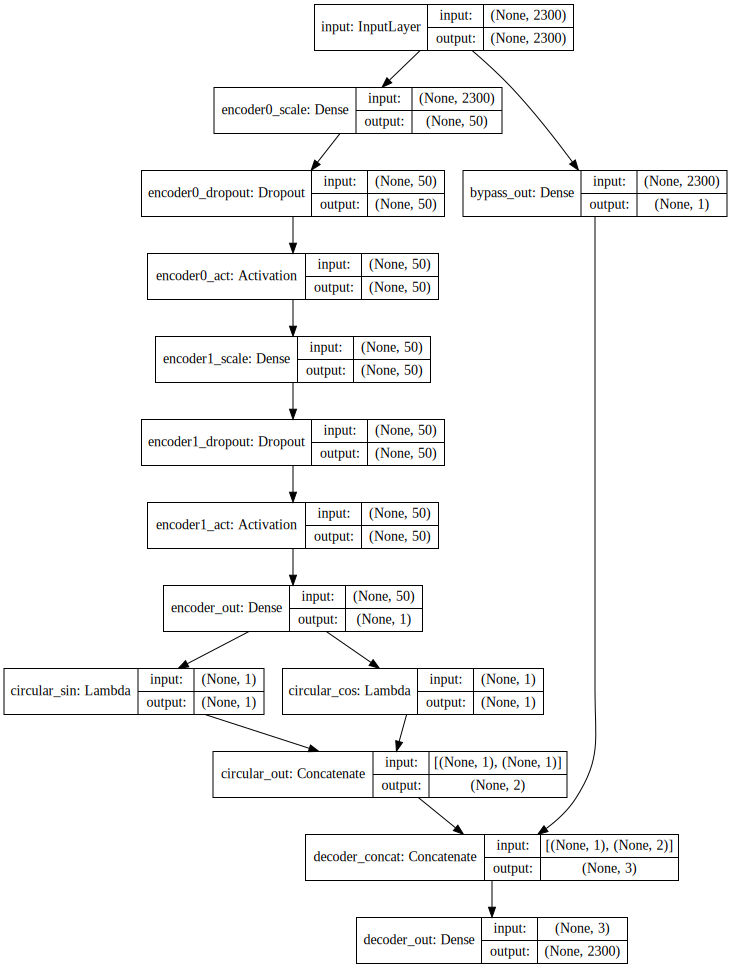

In [8]:
model.show_structure()

In [9]:
#model = models.AutoEncoder(input_width=gene.shape[1], 
#                           encoder_depth=2, 
#                           encoder_width=50, 
#                           n_circular_unit=1,
#                           n_logistic_unit=0,
#                           n_linear_unit=0,
#                           n_linear_bypass=1,
#                           dropout_rate=0.1,
#                           nonlinear_reg=1e-4)

In [10]:
model.train(gene, epochs=1000, verbose=100, rate=2e-4)

epoch: 100/1000, loss:  0.0820, time elapsed:  14.15s, time left:  127.34s
epoch: 200/1000, loss:  0.0452, time elapsed:  28.00s, time left:  111.99s
epoch: 300/1000, loss:  0.0447, time elapsed:  41.88s, time left:  97.72s
epoch: 400/1000, loss:  0.0383, time elapsed:  55.55s, time left:  83.33s
epoch: 500/1000, loss:  0.0398, time elapsed:  69.01s, time left:  69.01s
epoch: 600/1000, loss:  0.0369, time elapsed:  82.47s, time left:  54.98s
epoch: 700/1000, loss:  0.0358, time elapsed:  96.19s, time left:  41.22s
epoch: 800/1000, loss:  0.0358, time elapsed:  109.75s, time left:  27.44s
epoch: 900/1000, loss:  0.0387, time elapsed:  123.12s, time left:  13.68s
epoch: 1000/1000, loss:  0.0352, time elapsed:  136.31s, time left:  0.00s


In [11]:
pseudotime = model.predict_pseudotime(gene)

Text(0, 0.5, 'Simulated gene expression level')

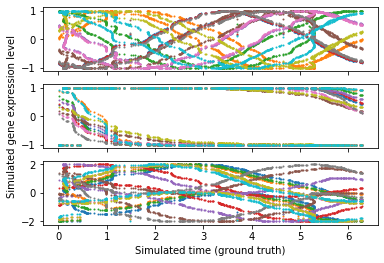

In [12]:
fig, ax = plt.subplots(3, 1, sharex=True)

for i in range(10):
    ax[0].scatter(x=pseudotime% (2 * np.pi), y=gene0[:, i], s=1)

for i in range(10):
    ax[1].scatter(x=pseudotime% (2 * np.pi), y=gene1[:, i], s=1)

for i in range(10):
    ax[2].scatter(x=pseudotime% (2 * np.pi), y=gene01[:, i], s=1)
ax[2].set_xlabel('Pseudotime')
ax[1].set_ylabel('Simulated gene expression level')

Text(0, 0.5, 'Simulated gene expression level')

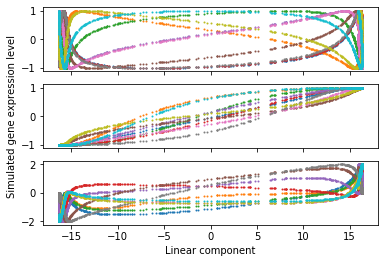

In [18]:
fig, ax = plt.subplots(3, 1, sharex=True)
import keras
linear = model.predict_linear_bypass(gene)

for i in range(10):
    ax[0].scatter(x=linear, y=gene0[:, i], s=1)

for i in range(10):
    ax[1].scatter(x=linear, y=gene1[:, i], s=1)

for i in range(10):
    ax[2].scatter(x=linear, y=gene01[:, i], s=1)
    
ax[2].set_xlabel('Linear component')
ax[1].set_ylabel('Simulated gene expression level')

Text(0, 0.5, 'Pseudotime (prediction)')

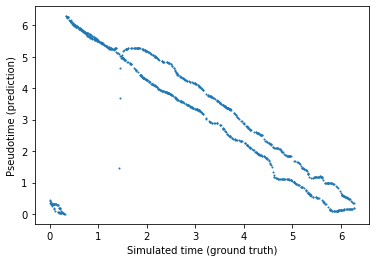

In [13]:
plt.scatter(cell_time % (2 * np.pi), pseudotime % (2 * np.pi), s=1)
plt.xlabel("Simulated time (ground truth)")
plt.ylabel("Pseudotime (prediction)")

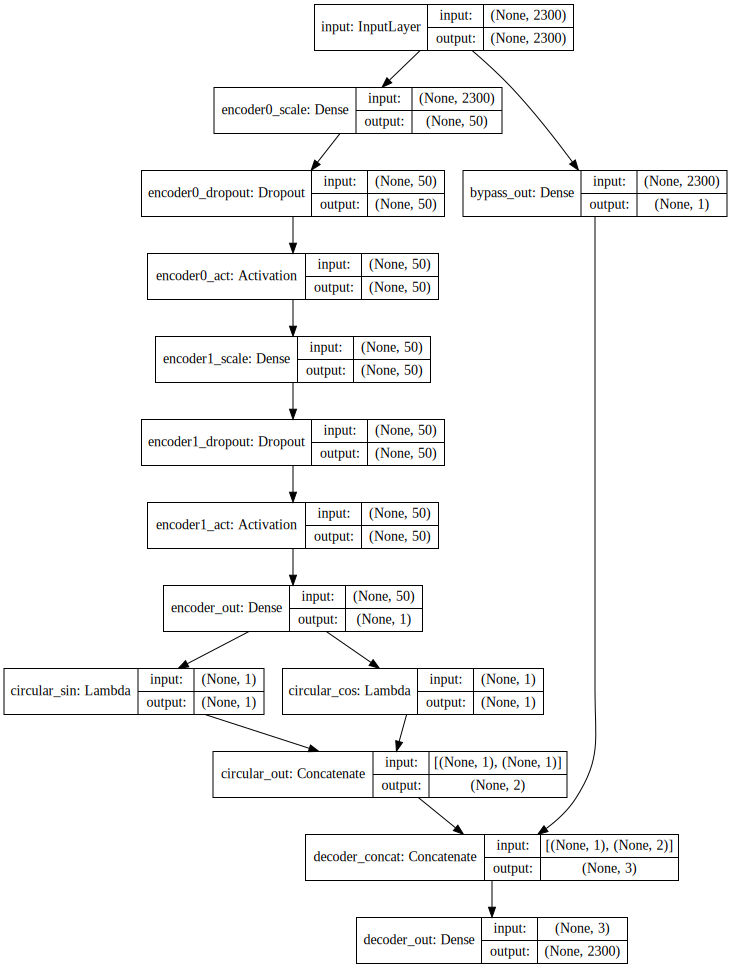

In [14]:
model.show_structure()

Text(0.5, 0, 'Simulated gene expression level')

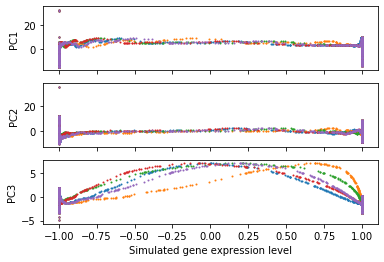

In [34]:
#residue = gene - np.hstack([np.sin(pseudotime), np.cos(pseudotime)]) @ model.get_weight()[1:3, :]

residue = gene - np.hstack([linear, np.sin(pseudotime), np.cos(pseudotime)]) @ model.get_weight()

pca_model = PCA(n_components=5)
pca_load = pca_model.fit_transform(residue)
pca_comp = pca_model.components_

fig, ax = plt.subplots(3, 1, sharex=True)
for j in range(3):
    for i in range(5):
        ax[j].scatter(gene1[:, i], pca_load[:, j], s=1)
        ax[j].set_ylabel('PC' + str(j + 1)) 
ax[-1].set_xlabel('Simulated gene expression level')

Text(0.5, 0, 'Simulated gene expression level')

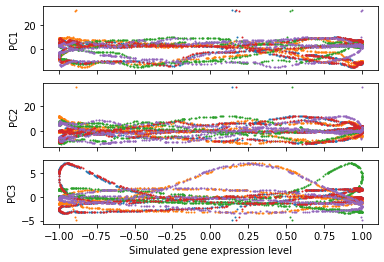

In [35]:
fig, ax = plt.subplots(3, 1, sharex=True)
for j in range(3):
    for i in range(5):
        ax[j].scatter(gene0[:, i], pca_load[:, j], s=1)
        ax[j].set_ylabel('PC' + str(j + 1)) 
ax[-1].set_xlabel('Simulated gene expression level')

Text(0.5, 0, 'Simulated gene expression level')

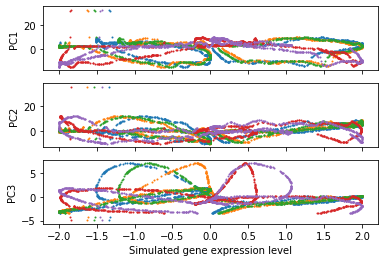

In [36]:
fig, ax = plt.subplots(3, 1, sharex=True)
for j in range(3):
    for i in range(5):
        ax[j].scatter(gene01[:, i], pca_load[:, j], s=1)
        ax[j].set_ylabel('PC' + str(j + 1)) 
ax[-1].set_xlabel('Simulated gene expression level')